# TSF Grip Task: Task 1

## Prediction Using Supervised ML

### The task is to predict the percentage of student based on number of study hours.
    
### This is a simple linear  regression tasks as it involves two variables.

### Linear regression performs the task to predict a dependent variable value (scores) based on a given independent variable (hours). So, this regression technique finds out a linear relationship between hours and scores.

### Name: Sristi Malla 

In [100]:
#importing libraries and classes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [101]:
#reading csv file
Student_df = pd.read_csv("http://bit.ly/w-data")
Student_df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [102]:
print(Student_df.shape)

(25, 2)


In [103]:
Student_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [104]:
Student_df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [105]:
Student_df.Scores.unique()

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 24,
       67, 69, 54, 35, 76, 86], dtype=int64)

### Visualization of data

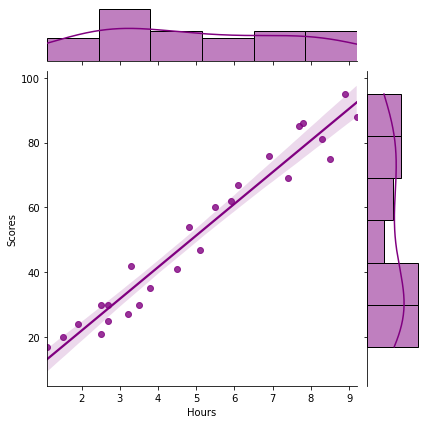

In [106]:
sns.jointplot("Hours", "Scores", data=Student_df, kind="reg",color='purple')

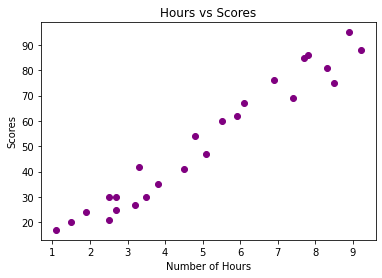

In [107]:
plt.scatter(Student_df['Hours'],Student_df['Scores'], color="purple")
plt.xlabel("Number of Hours")
plt.ylabel("Scores")
plt.title("Hours vs Scores")
plt.show()

<AxesSubplot:xlabel='Hours', ylabel='count'>

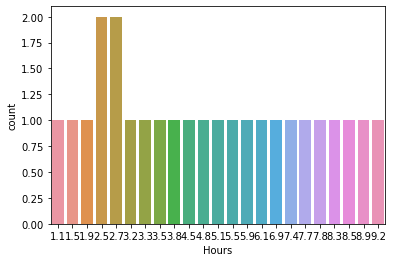

In [108]:
sns.countplot(x='Hours',data=Student_df)

In [109]:
#Feature Selection:dividing the given columns into two types of variables:dependent(or target variable) and independent variable(or feature variables)
X= Student_df.iloc[:,:-1].values #selecting all rows from first column
y= Student_df.iloc[:,1].values #selecting all rows from second column

In [110]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 0,test_size=0.2)
#here dataset is divided in ratio of 80:20 i.e 80% of data used for model training and 20% for model testing

In [111]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((20, 1), (20,), (5, 1), (5,))

### Building Model

In [112]:
model=LinearRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

<AxesSubplot:ylabel='Density'>

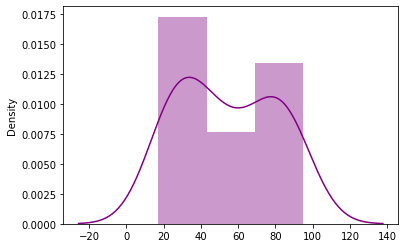

In [113]:
sns.distplot(y_train, kde=True,color='purple')

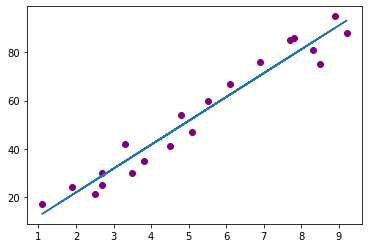

In [129]:
#Plotting the regression line for training data
line=model.coef_*X+model.intercept_
plt.scatter(X_train,y_train,c='purple')
plt.plot(X, line)
plt.show()

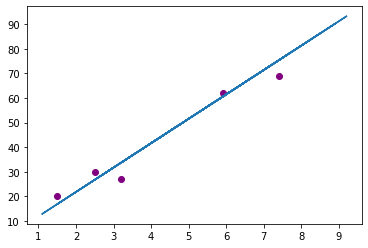

In [130]:
#Plotting the regression line for testing data
line=model.coef_*X+model.intercept_
plt.scatter(X_test,y_test,c='purple')
plt.plot(X, line)
plt.show()

In [114]:
print("Predicted values",y_pred) #predicted values
print("Actual values",y_test) #actual values

Predicted values [16.88414476 33.73226078 75.357018   26.79480124 60.49103328]
Actual values [20 27 69 30 62]


In [115]:
actual = list(y_test)
predicted=list(y_pred)
df = pd.DataFrame({ 'Actual values':actual,'Predicted values':predicted})
df

,Actual values,Predicted values
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [116]:
print('intercept:', model.intercept_)
print('slope:', model.coef_)

intercept: 2.018160041434683
slope: [9.91065648]


### Evaluation of model

In [117]:
print("Mean Absolute Error: ", metrics.mean_absolute_error(y_test,y_pred))
print("Mean Squared Error: ", metrics.mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error: ", metrics.mean_squared_error(y_test, y_pred)**0.5)
print("R2 Score: ", metrics.r2_score(y_test, y_pred))

Mean Absolute Error:  4.183859899002975
Mean Squared Error:  21.5987693072174
Root Mean Squared Error:  4.6474476121003665
R2 Score:  0.9454906892105356


In [124]:
print("Test Score: ",model.score(X_test,y_test)*100 )
print("raining Score: ",model.score(X_train,y_train)*100)

Test Score:  94.54906892105356
raining Score:  95.15510725211553


### Making Predictions

In [118]:
Predicted_score = model.predict([[9.25]])
print("If a student studies for 9.25 hours/day,the Predicted score will be {} %".format(Predicted_score[0]))

If a student studies for 9.25 hours/day,the Predicted score will be 93.69173248737538 %
